## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_file=pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_file.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
Number_of_Mice=combined_file["Sex"].count()
Number_of_Mice

1893

In [19]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
DuplicateMouse1= combined_file[combined_file.duplicated(["Mouse ID"])]
DuplicateMouse1.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
newtable = combined_file.drop_duplicates('Mouse ID')
newtable.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
New_Number_of_Mice=newtable["Sex"].count()
New_Number_of_Mice

249

## Summary Statistics

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#find out what are the drug regimens
Drug_Regimen=combined_file["Drug Regimen"].unique()
#Ramicane
only_Ramicane = combined_file.loc[combined_file["Drug Regimen"] == "Ramicane", :]
Ramicane_mean=only_Ramicane["Tumor Volume (mm3)"].mean()

# This method is the most straightforward, creating multiple series and putting them all together at the end.

40.2167450667105

In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regime
mean=combined_file.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median=combined_file.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance=combined_file.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
Stdev=combined_file.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM=combined_file.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary=pd.DataFrame({"mean":pd.Series(mean),
                        "median":pd.Series(median),
                        "variance":pd.Series(variance),
                        "Standard deviation":pd.Series(Stdev),
                         "SEM":pd.Series(SEM)})
pd.options.display.float_format = '{:.2f}'.format
summary
# This method produces everything in a single groupby function.

,mean,median,variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

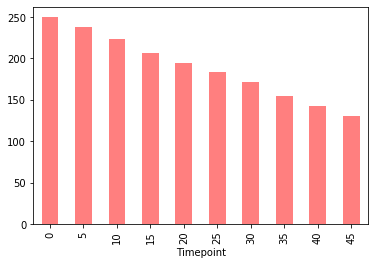

In [52]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.


combined_file.groupby('Timepoint')['Mouse ID'].count().plot(kind='bar',color='r', alpha=0.5, align="center")

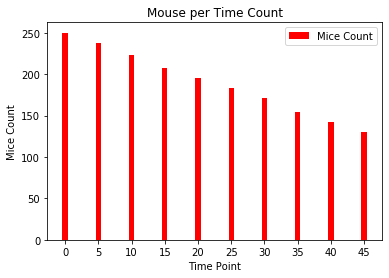

In [80]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis=combined_file["Timepoint"].unique()
y_axis=combined_file.groupby('Timepoint')['Mouse ID'].count()
plt.bar(x_axis, y_axis, color='r', align="center")
plt.title("Mouse per Time Count")
plt.legend({"Mice Count"},loc="upper right")
plt.xlabel("Time Point")
plt.ylabel("Mice Count")
plt.xticks(x_axis)
plt.show()


## Pie Plots

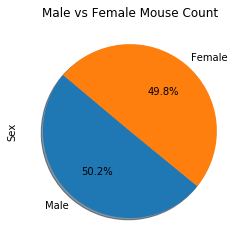

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie=newtable["Sex"].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True, startangle=140, title="Male vs Female Mouse Count")

pie

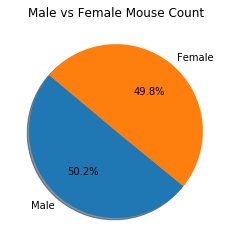

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels=newtable["Sex"].unique()
data=newtable["Sex"].value_counts()

plt.pie(data,labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Male vs Female Mouse Count")
plt.show()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

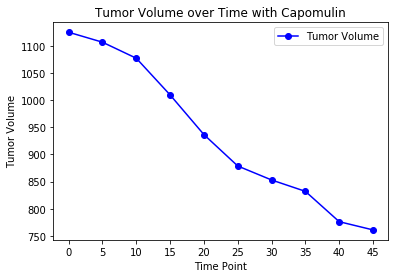

In [75]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
only_Capomulin = combined_file.loc[combined_file["Drug Regimen"] == "Capomulin", :]
x=only_Capomulin["Timepoint"].unique()
y=only_Capomulin.groupby("Timepoint")["Tumor Volume (mm3)"].sum()

TumorVolume_handle, = plt.plot(x, y, marker ='o', color='blue', label="Tumor Volume")
plt.title("Tumor Volume over Time with Capomulin")
plt.legend(loc="upper right")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")
plt.xticks(x_axis)
plt.show()


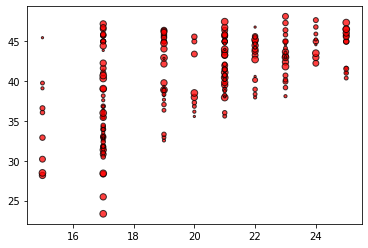

In [86]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(only_Capomulin["Weight (g)"], only_Capomulin["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
